# **Automated Chatbot for Data Query and Visualization**

# **CREATION OF CHAT BOT **

Objective : Create chatbots that answer data-related queries and generate visualizations on demand.

Tools : Python, GPT, chatbot frameworks, visualization libraries

# IMPORT LIBRARIES

In [34]:
pip install pandas matplotlib seaborn plotly flask


In [28]:
!pip install gpt4all

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00


# DATASET LOAD FROM FILE

In [37]:
from google.colab import files
import pandas as pd
import io

# Upload file
uploaded = files.upload()

#Load file into pandas
data = pd.read_excel(io.BytesIO(list(uploaded.values())[0]))

#Display first 5 rows
print(data.head())

Saving cleaned_dataset_task 5.xlsx to cleaned_dataset_task 5 (1).xlsx
        Date   Region Product  Quantity  UnitPrice StoreLocation CustomerType  \
0 2023-01-11    South   Chair         7      17.50       Store C       Retail   
1 2023-01-09  Central   Chair         3     330.22       Store C    Wholesale   
2 2025-01-18     West  Tablet         1     157.83       Store A    Wholesale   
3 2024-01-09     East  Tablet         8     582.52       Store D       Retail   
4 2025-01-17     West   Chair         2     251.69       Store C    Wholesale   

   Discount Salesperson  TotalPrice  ... Promotion Returned    OrderID  \
0      0.10       Alice    110.2500  ...  WINTER15        0  REG100006   
1      0.15      Carlos    842.0610  ...  FREESHIP        0  REG100007   
2      0.15      Carlos    134.1555  ...  FREESHIP        0  REG100013   
3      0.15       Frank   3961.1360  ...  WINTER15        0  REG100047   
4      0.00       Alice    503.3800  ...  FREESHIP        0  REG100051   

# GPT4ALL

In [ ]:
from gpt4all import GPT4All
model = GPT4All("gpt4all-falcon-q4_0.gguf")

Downloading: 100%|██████████| 4.21G/4.21G [01:10<00:00, 59.4MiB/s]


ASK_BOT FUNTION

In [ ]:
def ask_bot(question):
    response = model.generate(question)
    return response

PREDEFINED CHARTS

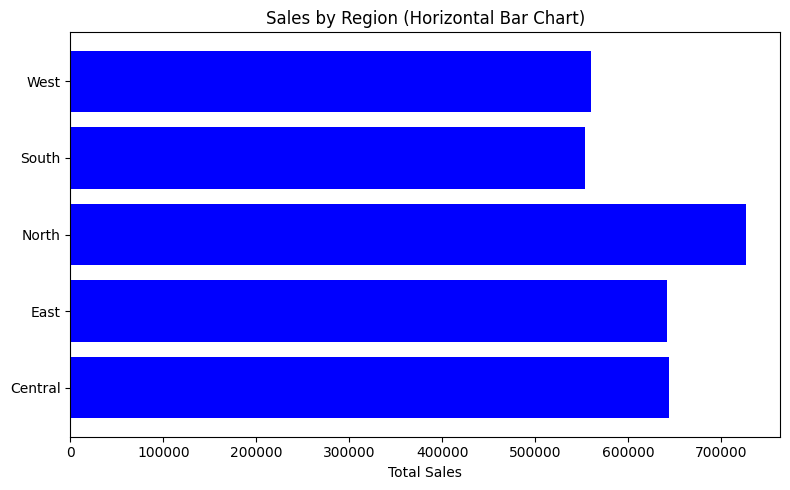

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#1. sales by region

sales_by_region = data.groupby('Region')['TotalPrice'].sum()

plt.figure(figsize=(8,5))
plt.barh(sales_by_region.index, sales_by_region.values, color='blue')
plt.title('Sales by Region (Horizontal Bar Chart)')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

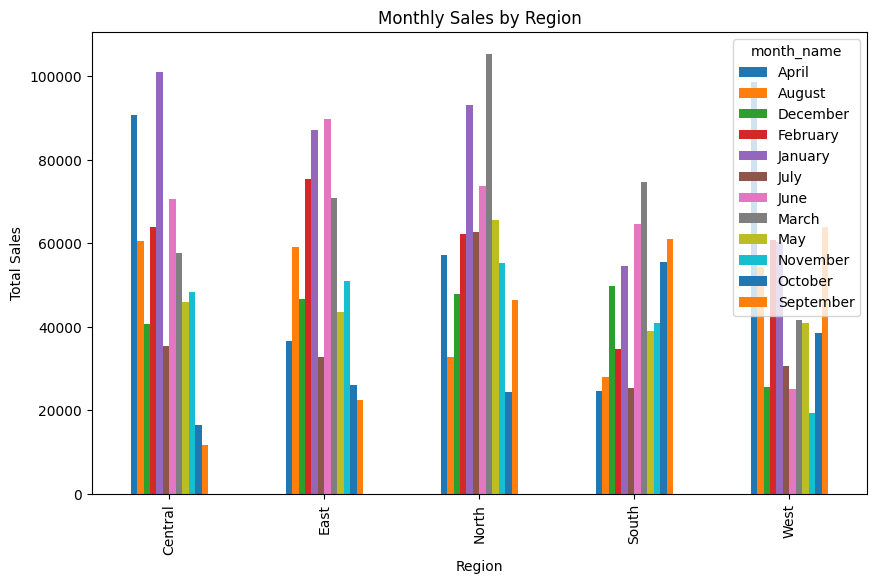

In [ ]:
#2. monthly sales of product ,,,by region

monthly_sales = data.groupby(['Region','month_name'])['TotalPrice'].sum().unstack()
monthly_sales.plot(kind='bar', figsize=(10,6), title='Monthly Sales by Region')
plt.ylabel('Total Sales')
plt.show()

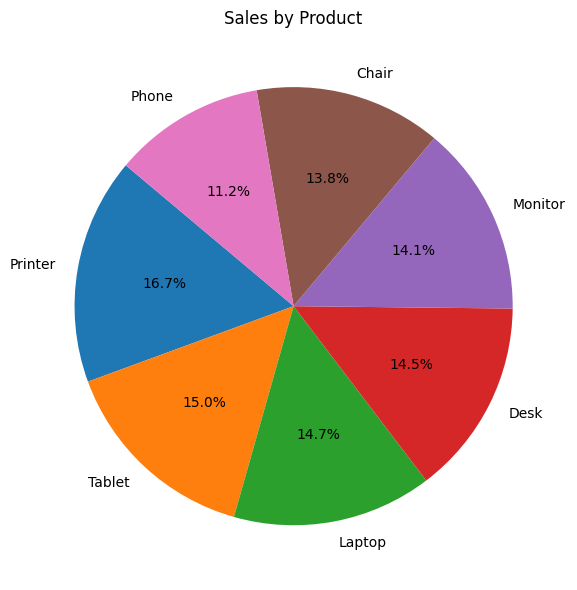

In [ ]:
#3. sales of product

sales_by_product = data.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.pie(
    sales_by_product,
    labels=sales_by_product.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Sales by Product')
plt.tight_layout()
plt.show()

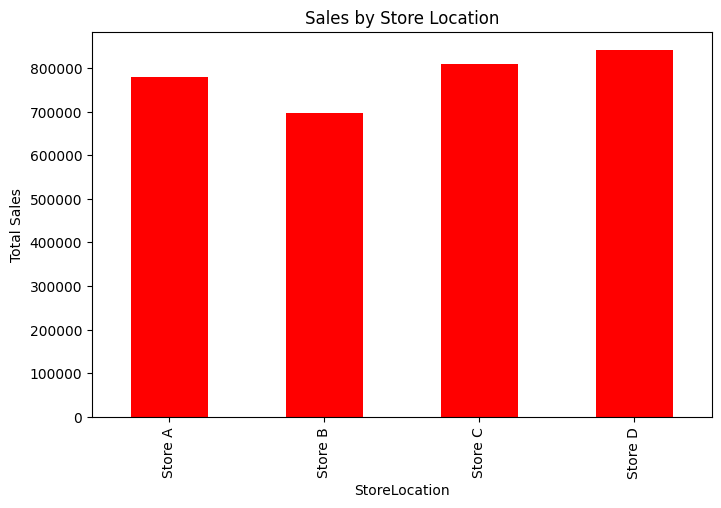

In [ ]:
#4. sales by loaction

sales_by_store = data.groupby('StoreLocation')['TotalPrice'].sum()
plt.figure(figsize=(8,5))
sales_by_store.plot(kind='bar', color='red', title='Sales by Store Location')
plt.ylabel('Total Sales')
plt.show()

# CHATBOT PERFORMANCE

In [40]:
print("Chatbot Ready! Type your query (type 'exit' to quit)")

while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit"]:
        print("Bot: Exiting chatbot. Bye!")
        break

    # -----------------------------
    # Manual query detection for demo
    # -----------------------------
    if "chair" in user_input.lower() and "last month" in user_input.lower():
        last_month = data['month'].max()  # assuming numeric month
        chair_sales = data[(data['Product'].str.lower() == "chair") &
                           (data['month'] == last_month)]['TotalPrice'].sum()
        print(f"Bot: Last month's chair sales = {chair_sales}")

        # Visualization
        chart_data = data[(data['Product'].str.lower() == "chair") &
                          (data['month'] == last_month)].groupby('Region')['TotalPrice'].sum()
        chart_data.plot(kind='bar', title="Chair Sales Last Month by Region", color='skyblue')
        plt.ylabel("Total Sales")
        plt.show()

# 1. # General Sales by Region chart

    elif "sales by region" in user_input.lower():
        # General Sales by Region chart
        sales_by_region = data.groupby('Region')['TotalPrice'].sum()
        print("Bot: Showing sales by region")
        sales_by_region.plot(kind='bar', title="Sales by Region", color='orange')
        plt.ylabel("Total Sales")
        plt.show()

#2. sales by product
    elif "sales by product" in user_input.lower():
        sales_by_product = data.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)
        print("Bot: Showing sales by product")
        sales_by_product.plot(kind='bar', title="Sales by Product", color='green')
        plt.ylabel("Total Sales")
        plt.show()
    else:
        # Fallback to GPT4All for text response
        bot_response = model.generate(user_input)
        print(f"Bot: {bot_response}")

Chatbot Ready! Type your query (type 'exit' to quit)
You: exit
Bot: Exiting chatbot. Bye!


MORE VISUALIZATION

In [42]:
print("Chatbot Ready! Type your query (type 'exit' to quit)")


# Chatbot Loop

while True:
    user_input = input("You: ")

    if user_input.lower() in ["exit", "quit"]:
        print("Bot: Exiting chatbot. Bye!")
        break


    # 3. Last Month Chair Sales (Bar Chart)

    if "chair" in user_input.lower() and "last month" in user_input.lower():
        last_month = data['month'].max()
        chair_sales = data[(data['Product'].str.lower() == "chair") &
                           (data['month'] == last_month)]['TotalPrice'].sum()

        print(f"Bot: Last month's chair sales = {chair_sales}")

        chart_data = data[(data['Product'].str.lower() == "chair") &
                          (data['month'] == last_month)].groupby('Region')['TotalPrice'].sum()
        chart_data.plot(kind='bar', title="Chair Sales Last Month by Region", color='skyblue')
        plt.ylabel("Total Sales")
        plt.show()


    # 4.  Sales by Region (Pie Chart)

    elif "sales by region" in user_input.lower():
        sales_by_region = data.groupby('Region')['TotalPrice'].sum()
        print("Bot: Showing sales by region")

        plt.figure(figsize=(7,7))
        plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
        plt.title("Sales by Region")
        plt.show()


    # 5. Sales by Product

    elif "sales by product" in user_input.lower():
        sales_by_product = data.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)
        print("Bot: Showing sales by product")

        sales_by_product.plot(kind='bar', title="Sales by Product", color='green')
        plt.ylabel("Total Sales")
        plt.show()


    # 4️. Monthly Sales Trend

    elif "sales trend" in user_input.lower() or "monthly sales" in user_input.lower():
        monthly_sales = data.groupby('month')['TotalPrice'].sum()
        print("Bot: Showing monthly sales trend")

        monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
        plt.ylabel("Total Sales")
        plt.xlabel("Month")
        plt.grid(True)
        plt.show()


    # 6. Sales by Customer Type (Pie Chart)

    elif "customer type" in user_input.lower():
        sales_by_customer = data.groupby('CustomerType')['TotalPrice'].sum()
        print("Bot: Showing sales by customer type")

        plt.figure(figsize=(7,7))
        plt.pie(sales_by_customer, labels=sales_by_customer.index, autopct='%1.1f%%', startangle=90)
        plt.title("Sales by Customer Type")
        plt.show()

    # 7. Top Products (Bar Chart)

    elif "top products" in user_input.lower() or "best selling" in user_input.lower():
        top_products = data.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).head(5)
        print("Bot: Showing top 5 best-selling products")

        top_products.plot(kind='bar', title="Top 5 Best-Selling Products", color='purple')
        plt.ylabel("Total Sales")
        plt.show()

    # 8. Payment Method Sales (Pie Chart)

    elif "payment method" in user_input.lower():
        sales_by_payment = data.groupby('PaymentMethod')['TotalPrice'].sum()
        print("Bot: Showing sales by payment method")

        plt.figure(figsize=(7,7))
        plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', startangle=90)
        plt.title("Sales by Payment Method")
        plt.show()


    # 9. Compare Products by Region (Grouped Bar Chart)

    elif "compare" in user_input.lower() and "region" in user_input.lower():
        pivot_data = data.pivot_table(values='TotalPrice', index='Region', columns='Product', aggfunc='sum')
        print("Bot: Comparing products by region")

        pivot_data.plot(kind='bar', figsize=(10,5), title="Product Comparison by Region")
        plt.ylabel("Total Sales")
        plt.show()


    # 10. Which store sold the most?

    elif "which store" in user_input.lower() and "most" in user_input.lower():
        sales_by_store = data.groupby('StoreLocation')['TotalPrice'].sum()
        top_store = sales_by_store.idxmax()
        top_store_sales = sales_by_store.max()

        print(f"Bot: The store with the highest sales is **{top_store}** with total sales = {top_store_sales}")


    # Fallback for unknown queries

    else:
        bot_response = model.generate(user_input)
        print(f"Bot: {bot_response}")

Chatbot Ready! Type your query (type 'exit' to quit)
You: exit
Bot: Exiting chatbot. Bye!
